## Preparation

In [105]:
import pandas as pd
import kagglehub 
import matplotlib.pyplot as plt
import os
import plotly.express as px

In [106]:
# Download latest version
path = kagglehub.dataset_download("kyanyoga/sample-sales-data")

print("Path to dataset files:", path)

Path to dataset files: /home/gitpod/.cache/kagglehub/datasets/kyanyoga/sample-sales-data/versions/1


In [107]:
all_files = os.listdir('/home/gitpod/.cache/kagglehub/datasets/kyanyoga/sample-sales-data/versions/1')
for file in all_files:
    print(file)

sales_data_sample.csv


In [108]:
raw = pd.read_csv(
    '/home/gitpod/.cache/kagglehub/datasets/kyanyoga/sample-sales-data/versions/1/sales_data_sample.csv',
    encoding='latin1'
)

## Explore the data

In [109]:
# Drop unnecessary columns

to_drop = ['ADDRESSLINE1','ADDRESSLINE2','STATE','POSTALCODE','TERRITORY','PHONE','CONTACTLASTNAME','CONTACTFIRSTNAME']
raw = raw.drop(to_drop, axis = 1)

In [110]:
# Change data type of ORDERDATE to datetime type

raw['ORDERDATE'] = pd.to_datetime(raw['ORDERDATE'])

In [111]:
# Summary stats of Quantitative variables

quantitive_vars = ['QUANTITYORDERED','PRICEEACH', 'SALES','MSRP']
describe_quantitive_vars = raw[quantitive_vars].describe()
describe_quantitive_vars.style.background_gradient(cmap = "Blues")

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072,100.715551
std,9.741443,20.174277,1841.865106,40.187912
min,6.000000,26.880000,482.130000,33.000000
25%,27.000000,68.860000,2203.430000,68.000000
50%,35.000000,95.700000,3184.800000,99.000000
75%,43.000000,100.000000,4508.000000,124.000000
max,97.000000,100.000000,14082.800000,214.000000


## Analyze

In [112]:
# Annual Revenue
annual_revenue = pd.DataFrame(raw.groupby(['YEAR_ID'])['SALES'].sum()).reset_index()
annual_revenue.style.background_gradient(cmap = "Blues")

,YEAR_ID,SALES
0,2003,3516979.540000
1,2004,4724162.600000
2,2005,1791486.710000


In [116]:
del plt.plot

In [117]:
# Plot Chart for Annual Revenue
plt.figure(figsize=(6, 3))
plt.plot(
    annual_revenue['YEAR_ID'],
    annual_revenue['SALES'],
    color="#F0FFFF"
)
plt.title("Annual Revenue")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()


# matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)

AttributeError: module 'matplotlib.pyplot' has no attribute 'plot'

<Figure size 600x300 with 0 Axes>

In [114]:
# Monthly Revenue
monthly_revenue = pd.DataFrame(raw.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum()).reset_index()
monthly_revenue['YEAR_MONTH_ID'] = monthly_revenue['YEAR_ID'].astype(str) + '-' + monthly_revenue['MONTH_ID'].astype(str)
monthly_revenue = monthly_revenue[['YEAR_MONTH_ID', 'SALES']]
monthly_revenue.style.background_gradient(cmap = "Blues")

,YEAR_MONTH_ID,SALES
0,2003-1,129753.600000
1,2003-2,140836.190000
2,2003-3,174504.900000
3,2003-4,201609.550000
4,2003-5,192673.110000
5,2003-6,168082.560000
6,2003-7,187731.880000
7,2003-8,197809.300000
8,2003-9,263973.360000
9,2003-10,568290.970000


TypeError: 'tuple' object is not callable

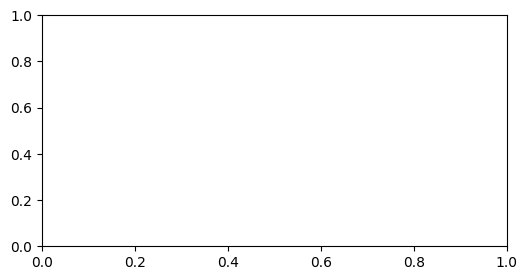

In [74]:
# Plot Chart for Monthly Revenue
fig = plt.subplots(figsize = (6,3))

plt.plot(
    monthly_revenue['SALES']
)
    